In [48]:
from IPython.display import HTML
from pathlib import Path
css_path = 'C:\\Users\\pramo\\Documents\\Curso Python Cientifico FGULL\\pythoncientifico'
css_rules = Path(css_path+'\\custom.css').read_text()
HTML('<style>' + css_rules + '</style>')

# Miniproyecto Pedro Manuel Ramos Rodríguez Plotly Express

# Importar paquetes necesarios

In [113]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
%matplotlib inline

## Información de las columnas del dataset


El dataset escogido es un experimento realizado por el Dr. Fadi Thabtah para la detección precoz del síndrome espectro autista (de las siglas del inglés ASD). Los datos de este dataset, son el resultado de haber utilizado una app móvil. Esta aplicación móvil, consistía en responder diez preguntas que estaban relacionadas con el comportamiento de un niño de edad entre 12 y 36 meses. Este comportamiento estaba basado en cómo reaccionaba al llamarle, cómo reaccionaba a desconocidos, qué hacía cuando veía a personas conocidas, etc.
Las respuestas de estas preguntas (**columnas A1-A10 del dataset**) son: 

* Siempre
* Normalmente
* Algunas Veces
* Rara vez
* Nunca

Para las preguntas desde la **A1-A9** si la respuesta escogida es  **Algunas veces** / **Rara vez** / **Nunca** se le asigna un **1** en el dataset y un **0** si contestó **Siempre** ó **Normalmente**. Sin embargo, para la pregunta **A10** si la respuesta fue **Siempre** / **Normalmente** / **Algunas veces**  se le asignó un **1** al dataset y un **0** si contestó Rara vez o Nunca.

El enlace de la aplicación que utilizaron para el experimento es el siguiente [Enlace de la app](https://play.google.com/store/apps/details?id=com.asd.asdquiz&&hl=en)

### Preguntas que recoge la aplicación

* A1	 Does your child look at you when you call his/her name?
* A2	How easy is it for you to get eye contact with your child? 
* A3	Does your child point to indicate that s/he wants something? (e.g. a toy that is  out of reach) 
* A4	Does your child point to share interest with you? (e.g. poin9ng at an  interes9ng sight) 
* A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
* A6	Does your child follow where you’re looking? 
* A7	If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)
* A8	Would you describe your child’s first words as: 
* A9	Does your child use simple gestures? (e.g. wave goodbye) 
* A10	Does your child stare at nothing with no apparent purpose? 

### Las columnas del dataset representan lo siguiente:


Leyendo la documentación que aporta el dataset, las columnas tienen el siguiente significado:

* A1: Respuesta a la pregunta 1 / Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A2: Question 2 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A3: Question 3 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado

* A4: Question 4 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A5: Question 5 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A6: A6: Question 6 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A7: Question 7 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A8: Question 8 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A9: Question 9 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* A10 Question 10 Answer 	Binaria (0, 1) El código de respuesta a la pregunta basado en el método usado
* Age:	Númerica 	Edad en meses de los niños pequeños
* Score by Q-chat-10: 	Numerica(1-10) (Menor o igual a 3 no tiene sintomas de ASD; >3 tratar ASD)
* Sexo:	Tipo caracter	Masculino o Femenino 
* Ethnicity:	Cadena	Tipo de etnicidad en cadena de caracteres ['middle eastern' 'White European' 'Hispanic' 'black' 'asian' 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
* Nacido con ictericia:	Booleano  (si o no)	Indica si ha nacido con ictericia o no
* Historial con miembros de la familia con ASD:	Booleano  (si o no)	Si algún miembro de la familia tiene PDD
* Qué persona realizó el test:	Cadena 	Padre, el mismo, cuidador, personal médico, clínico ,etc.
* Variable Class: 	Cadena 	Tratar ASD o no tratarlo (lo genera automáticamente la app una vez contestadas las preguntas) los valores son Si / No

La información del dataset recomienda eliminar la variable de la puntuación (**Qchat-10-Score**) para que el modelo a crear no genere overfitting

## Función para generar datos aleatorios y crear un modelo mejor

In [50]:
def generate_random_data(index):
    """this function will generate 2000 random data for feeding the dataset and improve the model"""
    #A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_mons,Qchat-10-Score,sex,ethnicity,jaundice,Family_mem_with_ASD
    #who completed the test, class/ASD traits
    a_values = [0,1]
    age_mons = [mons for mons in range(9,36)]
#     q_score = sum(a_values)  sumatorio de todos los valores de a
    sex = ['f','m']
    ethnicity =[
        'middle eastern',
        'White European',
        'Hispanic',
        'black',
        'asian',
        'south asian',
        'Native Indian',
        'Others',
        'Latino',
        'mixed',
        'Pacifica'
    ]
    jaundice = ['yes','no']
    family_mem_with_asd = ['yes','no']
    #detecta healt care professional y Health Care Professional como diferentes ojo
    test_completed_by = [
        'family member',
        'Health Care Professional',
        'Self',
        'Others'
    ]
    new_datas = pd.DataFrame(columns = [
        'Case_No',
        'A1',
        'A2',
        'A3',
        'A4',
        'A5',
        'A6',
        'A7',
        'A8',
        'A9',
        'A10',
        'Age_Mons',
        'Qchat-10-Score',
        'Sex',
        'Ethnicity',
        'Jaundice',
        'Family_mem_with_ASD',
        'Who completed the test',
        'Class/ASD Traits '
    ])
    for i in range(index,index+6000):
        new_datas.loc[i,'Case_No']= i
        new_datas.loc[i,'A1']= np.random.choice(a_values)
        new_datas.loc[i,'A2'] = np.random.choice(a_values)
        new_datas.loc[i,'A3'] = np.random.choice(a_values)                      
        new_datas.loc[i,'A4'] = np.random.choice(a_values)    
        new_datas.loc[i,'A5'] = np.random.choice(a_values)                 
        new_datas.loc[i,'A6'] = np.random.choice(a_values)
        new_datas.loc[i,'A7'] = np.random.choice(a_values)
        new_datas.loc[i,'A8'] = np.random.choice(a_values)
        new_datas.loc[i,'A9'] = np.random.choice(a_values)
        new_datas.loc[i,'A10'] = np.random.choice(a_values)
        new_datas.loc[i,'Age_Mons'] = np.random.choice(age_mons)
        new_datas.loc[i,'Qchat-10-Score'] = sum([
            new_datas.loc[i, 'A1'],
            new_datas.loc[i, 'A2'],
            new_datas.loc[i, 'A3'],
            new_datas.loc[i, 'A4'],
            new_datas.loc[i,'A5'],
            new_datas.loc[i,'A6'],
            new_datas.loc[i, 'A7'],
            new_datas.loc[i, 'A8'],
            new_datas.loc[i, 'A9'],
            new_datas.loc[i, 'A10']
        ])
        new_datas.loc[i,'Sex'] = np.random.choice(sex)
        new_datas.loc[i, 'Ethnicity'] = np.random.choice(ethnicity)
        new_datas.loc[i, 'Jaundice'] = np.random.choice(jaundice)
        new_datas.loc[i, 'Family_mem_with_ASD'] = np.random.choice(family_mem_with_asd)
        new_datas.loc[i, 'Who completed the test'] = np.random.choice(test_completed_by)
        new_datas.loc[i, 'Class/ASD Traits '] = 'Yes' if new_datas.loc[i,'Qchat-10-Score'] > 3 else 'No'
    return new_datas

## Carga de datos

In [202]:
path = 'C:/Users/pramo/Documents/Curso Python Cientifico FGULL/pythoncientifico/data/'
df = pd.read_csv(path + 'Autism/Toddler_Autism_dataset_july_2018.csv')
# random_df = generate_random_data(len(df))
# random_df = random_df.apply(pd.to_numeric,errors='ignore')
# df = pd.concat([df,random_df])
df.head(9)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No


## Comprobación de número de filas y columnas que posee el dataset

In [52]:
df.shape

(1054, 19)

### Número total de filas y columnas

El dataset posee 1054 filas con un número total de 16 columnas

## Comprobar nombres de columnas, tipos de datos y si tiene o no valores nulos

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64

### Información del dataset
Se puede comprobar que no existen valores nulos en ninguna de las columnas de este dataset. Por tanto, no es necesario la gestión de valores nulos. Además, todas las columnas que tienen que ver con las preguntas de la aplicación son de tipo int 64 mientras que las que tienen que ver con sexo, etnicidad, etc son de tipo categórica (objects).

### Comprobar cuartiles, medias, desviaciones típicas, valores máximos y mínimos

In [54]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


## Estandarizar los nombres de las columnas (minúsculas con _ en vez de espacios)

El primer paso para trabajar mejor con el dataset, será eliminar espacios en blancos al final del nombre de la columnas y posteriormente modificar los espacios en blancos y sustituirlos por **_**

In [203]:
df.columns = df.columns.str.strip().str.replace(' ','_')
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class/ASD_Traits'],
      dtype='object')

### Eliminación de la columna Score y quién completo el test

Para trabajar mejor con el conjunto de datos, se eliminarán las columnas *Case_No*, *Qchat-10-Score*, y *Who_completed_the_test*.

* La primera columna es un identificador que no será necesario para nada en el tratamiento de los datos
* La segunda, es la columna que indica la puntuación y que la documentación del dataset recomendaba eliminar para no tener overfitting a la hora de realizar el modelo.
* Y la última, es una columna que indicaba qué persona había utilizado la aplicación para rellenar los datos. Esta información, en un principio no es necesaria para el tratamiento de los datos del dataset.

In [204]:
df = df.drop(['Case_No','Qchat-10-Score','Who_completed_the_test'], axis=1)
print(df.columns)
df.head()

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD_Traits'],
      dtype='object')


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


### Columnas resultantes

Tras realizar el `df.drop()`, el resultado de nuestro dataset será el de 1054 filas y un total de 16 columnas

### Obtención de los datos positivos

El primer paso a realizar es comprobar del conjunto de datos, que porcentaje de los datos tienen familiares con antecedentes de ASD. A continuación, se procede a calcular los positivos que se han obtenido en tratar ASD

In [57]:
family_mem_ASD = df[df['Family_mem_with_ASD'] == 'yes']
asd_traits = df[df['Class/ASD_Traits'] == 'Yes']
print(len(family_mem_ASD) / len(df))
print(len(asd_traits)/len(df))
print(df[df['Class/ASD_Traits'] == 'Yes']['Class/ASD_Traits'].count())
print(df[df['Family_mem_with_ASD'] == 'yes']['Family_mem_with_ASD'].count())

0.16129032258064516
0.6907020872865275
728
170


Una vez realizados los cálculos, se puede observar lo siguiente:

* **728** casos han dado positivo a tratar ASD. Esto quiere decir que el **69,07%** de los datos ha dado positivo para tratar el ASD.

* Sin embargo, los datos indican que **170** casos tiene familiares con antecedentes de ASD lo que significa un **16.12%** de los casos.


### Histograma casos positivos por edad

El siguiente paso será ver cómo se distribuyen los datos. Para ello lo más normal es realizar un histograma utilizando como variable la edad en meses de los casos estudiados.

In [58]:
px.histogram(
    df,
    x='Age_Mons',
    barmode='overlay',
    color='Age_Mons',
    title='Positive Cases by Age Mons',
    nbins=50).update(layout=dict(title=dict(x=0.5),yaxis=dict(title='Positive_Cases')))


## Gráfico de Porcentaje de Casos estudiados con familiares con ASD

A continuación se procede a realizar gráficos de tipo queso con los casos 

In [106]:
def create_colors(n_colors):
    colors = []
    for i in range(n_colors):
        colors.append('rgba('+str(np.random.randint(0, 255))+','+str(np.random.randint(0, 255))+','+str(np.random.randint(0, 255))+','+str(0.6))
    return colors

In [112]:
values = [ 1-(len(family_mem_ASD) / len(df)),len(family_mem_ASD) / len(df)]
labels = np.unique(df['Family_mem_with_ASD'])
colors = colors = create_colors(len(values))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker = {'colors':colors})])
fig.show()


# fig = {
#   'data': [
#     {
#       'values': values,
#       'labels': labels,
#       'marker': {'colors': colors,'line': {'color':'#000000', 'width':2}},
#       'domain': {'x': [0, .5]},
#       'name': 'Family Mem with ASD',
#       'hoverinfo':'label+percent+name',
#       'type': 'pie'
#     },
#   ],
#   'layout': {
#        'title':'Percentaje Family Mem with ASD',
#        'annotations': [
#            { 'font': { 'size': 20},
#               'showarrow': False,
#               'text': '',
#               'x': 0.20,
#               'y': 1
#             },
#         ]
#   }
# }
# iplot(fig)

### Resultados obtenidos en el gráfico tipo queso

Como se ha comprobado anteriormente, el **16.1%** de los datos de nuestro conjunto de datos ha dado positivo en casos de familiares con asd. Mientras que el resto, el **83.9%** de los datos indica que no hay familiares con tratamiento de ASD.

### Gráfica de porcentaje de casos a tratar el ASD

A continuación, se muestra gráficamente los casos positivos de tratamiento de ASD de nuestro conjunto de datos

In [135]:
values = [1-(len(asd_traits)/len(df)),len(asd_traits)/len(df)]
labels = np.unique(df['Class/ASD_Traits'])
colors = colors = create_colors(len(values))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker = {'colors':colors})],layout={'annotations': [{ 'font': { 'size': 20},'showarrow': False,'text': 'Percentaje ASD Traits','x': 0.50,'y': 1.2},]})
fig.show()
# fig = {
#   'data': [
#     {
#       'values': values,
#       'labels': labels,
#       'marker': {'colors': colors,'line': {'color':'#000000', 'width':2}},
#       'domain': {'x': [0, .5]},
#       'hoverinfo':'label+percent+name',
#       'type': 'pie'
#     },
#   ],
#   'layout': {
#        'title':'Percentaje ASD Traits ',
#        'annotations': [
#            { 'font': { 'size': 20},
#               'showarrow': False,
#               'text': '',
#               'x': 0.20,
#               'y': 1
#             },
#         ]
#   }
# }
# iplot(fig)

### Resultados del gráfico de positivos en tratamiento de ASD

Al igual que el caso anterior, se puede verificar que efectivamente el **69.1%** de los datos han dado positivo para el tratamiento de ASD.

### Casos positivos de tratamiento de ASD con respecto a antecedentes familiares

Una vez demostrado que los cáclulos anteriores son correctos, el siguiente paso es analizar los casos positivos a tratar de ASD y que además tienen familiares con antecedentes de ASD. A continuación, se muestra el gráfico resultante de estos casos particulares.

In [136]:

# values = [1-(len(asd_traits)/len(df)),len(asd_traits)/len(df)]
# labels = np.unique(df['Class/ASD_Traits'])
# colors = colors = create_colors(len(values))
positives_family_mem = df['Class/ASD_Traits'].eq('Yes').groupby(df['Family_mem_with_ASD']).sum()
values = np.unique(positives_family_mem)
labels = positives_family_mem.index
colors = create_colors(len(values))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker = {'colors':colors})],layout={'annotations': [{ 'font': { 'size': 20},'showarrow': False,'text': 'Percentaje ASD Traits/ Family Mem with ASD','x': 0.50,'y': 1.2},]})
fig.show()

# fig = {
#   'data': [
#     {
#       'values': values,
#       'labels': labels,
#       'marker': {'colors': colors,'line': {'color':'#000000', 'width':2}}, 
#       'domain': {'x': [0, .5]},
#       'hoverinfo':'label+percent+name',
#       'hole': .1,
#       'type': 'pie'
#     },
#   ],
#   'layout': {
#        'title':'Percentaje ASD Traits/ Family Mem with ASD',
#        'annotations': [
#            { 'font': { 'size': 20},
#               'showarrow': False,
#               'text': '',
#               'x': 0.20,
#               'y': 1
#             },
#         ]
#   }
# }
# iplot(fig)

### Resultados del gráfico obtenido

Una vez tratado los datos, se puede comprobar que el **84.2%** de los casos que han dado como positivos a tratar ASD tienen familiares con antecedentes en ASD. Mientras que el **15.8%** restante ha dado negativo.

### Gráfica de casos positivos de ASD por razas étnicas

Una vez analizados los casos positivos, los negativos, los que han dado positivo con familiares con antecedentes en ASD, el siguiente paso es comprobar los positivos y los negativos por raza étnica. A continuación se muestran los resultados obtenidos:

In [63]:
px.histogram(
    df,
    x="Ethnicity",
    barmode='group',
    color='Class/ASD_Traits',
    histfunc='sum',
    title='Positive Cases by Age Mons').update(layout=dict(title=dict(x=0.5),yaxis=dict(title='Positive_Cases')))


En esta ocasión, se puede apreciar que los casos positivos son mayores en la raza blanca europea seguida de la asiática. Un factor destacable en los datos es que en razas pácificas y las indias nativas son pocos los casos que han dado positivo en ASD. Hay que tener en cuenta que los datos pueden estar realizados más con una raza étnica que con otra, por eso los resultados pueden ser tan dispares.

### Cálculo de casos positivos por edad

A continmuación, se calculará el número de casos positivos por edad para demostrar mediante un gráfico de barras en que edad se han dado más casos positivos. Para comprobar que los datos son correctos se han impreso los casos positivos y los negativos (sumando todo los datos que tiene el dataset)

In [64]:
positives_age = df['Class/ASD_Traits'].eq('Yes').groupby(df['Age_Mons']).sum()
positives = sum(df['Class/ASD_Traits'].eq('Yes'))
negatives = len(df['Class/ASD_Traits']) - positives
print(f'Positives :{positives}')
print(f'Negatives: {negatives}')

Positives :728
Negatives: 326


In [65]:
# positives_age.plot(kind='bar', figsize=(15,5),rot=-50, title='ASD_Traits /Age_mons')
px.histogram(
    df,
    x="Age_Mons",
#     barmode='group',
    color='Age_Mons',
#     histfunc='sum',
    nbins=50,
    title='ASD_Traits/Age_Mons').update(layout=dict(title=dict(x=0.5),yaxis=dict(title='Positive_Cases')))

# px.histogram?

Analizando los datos, se puede apreciar que se ha dado un alto porcentaje de casos positivos en tratamiento de ASD en niños/as de edad de 36 meses. Otro dato a destacar es el número de casos que se han dado a la corta edad de 12 meses, esto indica que cuanto mayor sea la edad del niño/a y no se haya diagnosticado el ASD, mayores probabilidades hay de que de positivo en el test. Además, si se observa la gráfica detenidamente, se aprecia que hay mayor número de casos positivos cuando se superan los 24 meses de edad. Esto es un dato significativo para intentar predecir el ASD antes de esta edad.

### Datos númericos del gráfico anterior

A continuación, para corroborar los datos del gráfico anterior, se muestran en número los datos positivos de niños menores a 24 meses de edad y los mayores a 24 meses.

In [66]:
print(f'Casos Positivos con edad en meses menores a 24 meses: {positives_age[positives_age < 24].sum()}')
print(f'Casos Positivos con edad mayor/igual a 24 meses: {positives_age[positives_age >= 24].sum()}')
print(f'Media de edad en meses de casos positivos de ASD: {positives_age.mean()}')

Casos Positivos con edad en meses menores a 24 meses: 245.0
Casos Positivos con edad mayor/igual a 24 meses: 483.0
Media de edad en meses de casos positivos de ASD: 29.12


Como se indicó al realizar la gráfica de casos positivos por edad, se verifica que hay más casos positivos en niños/as mayores a 24 meses. Calculando la edad media de casos positivos, se obtiene el valor de **29.12 meses**. Una edad a tener en cuenta para poder tratar a un niño de si puede dar positivo o negativo en ASD.

# Casos positivos por sexo

A continuación, se mostrará el numero de casos positivos distinguiéndolos por sexo

In [140]:
positives_sex = df['Class/ASD_Traits'].eq('Yes').groupby(df['Sex']).sum()
positives_female = positives_sex['f']
positives_male = positives_sex['m']
labels = ['positives female','positives male']
values = [positives_female,positives_male]
colors = create_colors(len(values))
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker = {'colors':colors})],layout={'annotations': [{ 'font': { 'size': 20},'showarrow': False,'text': 'Percentaje ASD Traits by Sex','x': 0.50,'y': 1.2},]})
fig.show()



# fig = {
#   'data': [
#     {
#       'values': values,
#       'labels': ['Female','Male'],
#       'marker': {'colors': colors,'line': {'color':'#000000', 'width':2}}, 
#       'domain': {'x': [0, .5]},
#       'hoverinfo':'label+percent+name',
#       'type': 'pie'
#     },
#   ],
#   'layout': {
#        'title':'Percentaje ASD Traits by Sex',
#        'annotations': [
#            { 'font': { 'size': 20},
#               'showarrow': False,
#               'text': '',
#               'x': 0.20,
#               'y': 1
#             },
#         ]
#   }
# }
# iplot(fig)

Una vez tratado los datos, se puede apreciar que el **73.4%** de los casos que han dado como positivo en tratamiento de ASD son niños mientras que el **26.6%** restante es de niñas. Lo que no se sabe del experimento es si el número del conjunto de datos pertenece al 50% de niños y 50% de niñas, por tanto este dato no quiere indicar que un niño sea más posible a dar positivo en tratamiento sobre ASD.

## Matriz de correlación

Una vez tratados los datos de nuestro dataset y ver cómo se distribuyen etc. Algo a comprobar es cómo se correlacionan estos datos. Para ello se realizará la matriz de correlación y se puede comprobar visualmente si los datos se correlacionan bien o mal, si se correlacionan positiva o negativamente, etc.

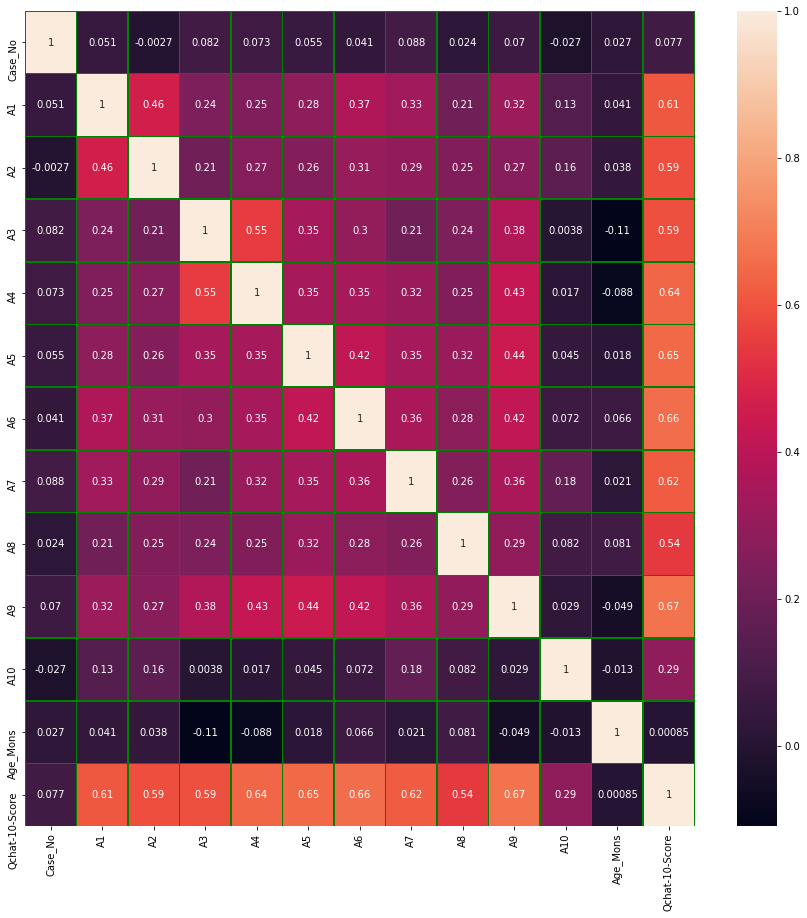

In [142]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True,linewidths=0.5,linecolor="green",)

En esta ocasión, la matriz de correlación no indica mucho ya que nuestros datos son simplemente unas preguntas que tienen un 1 o un 0 dependiendo de la respuesta obtenida. Además, al haber eliminado la única columna que se correlaciona con los resultados del cuestionario realizado no se puede apreciar una buena correlación en los datos.

# Gráficos de dispersión

Para tener una mejor imagen de todos los tipos de gráficas a poder realizar y cómo serán, a continuación se muestran los gráficos de dispersión del conjunto de datos.

In [144]:
# sns.pairplot(df)
# plt.show()

# Creación de variables dummies para columnas categoricas

In [70]:
df_with_dummies = pd.get_dummies(df)

In [71]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD_Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,Yes


# Creación del modelo

Para la creación del modelo se realizará una selección de diferentes algoritmos y comprobar cuál de ellos proporciona una mejor precisión en el conjunto de datos.
Las columnas seleccionadas para la creación del modelo son las siguientes:
* X: Se seleccionará todo el dataframe y en otra ocasión se eliminará la columna **Class/ASD_Traits** que será la columna seleccionada para Y.
* Y: La columna del dataset **Class_ASD_Traits** que es la que realmente nos indica el resultado que queremos (saber si un niño/a ha dado positivo para el tratamiento de ASD)

Los algoritmos seleccionados para la creación del modelos son:

* Regresión Lineal
* Regresión Logística
* KNN
* Arbol de decisiones


### Carga de paquetes necesarios para crear el modelo

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

### Carga de métodos de tipos de algoritmos

In [206]:
knn = KNeighborsClassifier(n_neighbors = 3)

### Comparación de Regresión Lineal con variables dummies y Label encoder de Scikitlearn 

A continuación, se procederá a crear el modelo utilizando el algoritmo de **Regresión Lineal** utilizando primero como variable X todas las columnas del dataset y posteriormente eliminando la columna que se va a tratar en Y (siendo esto lo más conveniente para evitar el overfitting)

#### Regresión Lineal usando dummies con X siendo todas las columnas

### Funciones para crear los modelos de los diferentes algoritmos

In [207]:
def create_knn_model(X,Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    print(f'Presicion con KNN {knn.score(x_test,y_test)}')

## Realización del modelo usando KNN

En esta ocasión, no se realizará el modelo utilizando variables dummies y LabelEncoder, sino que se utilizará LabelEncoder ya que es propio de scikitlearn.

In [208]:
le = LabelEncoder()
columns = ['Family_mem_with_ASD', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
X = df.drop(['Age_Mons','Class/ASD_Traits','Ethnicity','Sex'], axis = 1)
Y = df['Class/ASD_Traits']
create_knn_model(X,Y)

Presicion con KNN 0.9478672985781991


### Resultados del KNN
Utilizando el algoritmo del KNN, se puede apreciar que la precisión utilizando la variable x con todas las columnas del conjunto de datos es algo mayor que eliminando la columna a predecir.

### Comprobación de mejor valor K para la creación del modelo

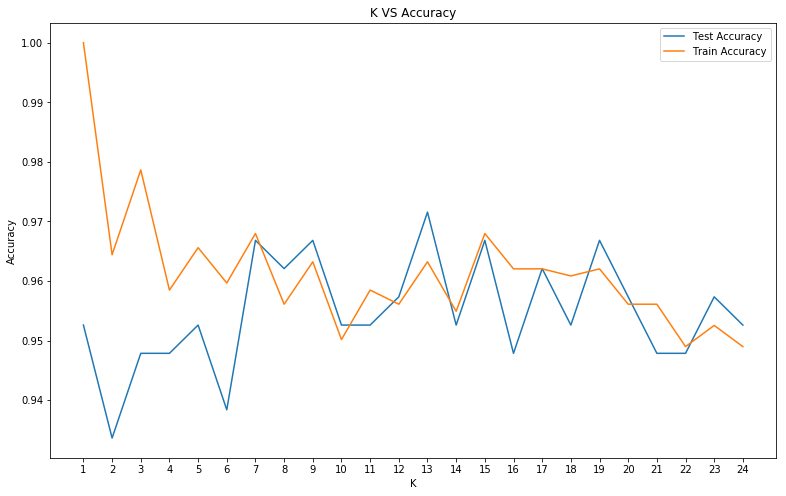

Best Accuracy we can get is 0.9715639810426541 with k = 13


In [209]:
train_accuracy = []
test_accuracy = []
rg = np.arange(1, 25)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)
for i, k in enumerate(rg):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))
plt.figure(figsize=[13,8])
plt.plot(rg, test_accuracy, label = 'Test Accuracy')
plt.plot(rg, train_accuracy, label = 'Train Accuracy')
plt.legend()
plt.title('K VS Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(rg)
plt.show()
print(f"Best Accuracy we can get is {np.max(test_accuracy)} with k = {1+test_accuracy.index(np.max(test_accuracy))}")

Anteriormente, se obtuvo una precisión del 95,2% sin indicar qué valor de K se utilizaría para crear el modelo. En esta ocasión, se indica que el mejor valor de K para generar el modelo es **K=13** y dando una precisión un poquito mejor que la que se obtuvo sin indicar el valor, siendo el resultado de un **97,15%**.

### Hiperparámetros

En esta ocasión, si al algoritmo KNN se le modifica el hiperparámetro de número de vecinos, el resultado a obtener es incluso mejor al obtenido con el valor **K=19**.

In [210]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) #cv es el numero de veces que va a ajustar los hiperparametros
knn_cv.fit(X,Y)

# Print hyperparameter
print("Hiperparámetro K ajustado: {}".format(knn_cv.best_params_)) 
print("Mejor puntuación: {}".format(knn_cv.best_score_))

Hiperparámetro K ajustado: {'n_neighbors': 9}
Mejor puntuación: 0.9563567362428842


## Generación del modelo con el algoritmo lightgbm usando arboles de decisión

In [327]:
import lightgbm as lgb

train_index = round(int(x_train.shape[0]*0.8))
dev_X = x_train[:train_index] 
val_X = x_train[train_index:]
dev_y = y_train[:train_index] 
val_y = y_train[train_index:] 

params = {"objective" : "regression", "metric" : "mae", 'n_estimators':20000, 'early_stopping_rounds':200,
          "num_leaves" : 31, "learning_rate" : 0.08, "num_threads" : 4,"colsample_bytree" : 0.7}
    
lgtrain = lgb.Dataset(dev_X, label=dev_y)
lgval = lgb.Dataset(val_X, label=val_y)
#en los conjuntos de validacion se suele poner el de validacion y el de entrenamiento para ver cuando empieza a realizar overfitting
#el verbose es para que escupa todo lo que hace el algoritmo en entrenar
model = lgb.train(params, lgtrain, valid_sets=[lgtrain, lgval], early_stopping_rounds=200, verbose_eval=1000)
    
pred_test_y = model.predict(x_test, num_iteration=model.best_iteration,raw_score=True)
pred_test_y

ValueError: could not convert string to float: 'Yes'

### Resultados de predicción

In [168]:
for i in range(0,len(pred_test_y)):
    if pred_test_y[i]>=.5:
        pred_test_y[i]=1
    else:  
        pred_test_y[i]=0

print('The accuracy of prediction is:', accuracy_score(y_test, pred_test_y))

The accuracy of prediction is: 0.966824644549763


## Predecir usando nuestro nuevo modelo.

In [326]:
#primero generar 10 valores entre 0-1
#insertar un 0 o un 1 (ictericia)
#insertar un 0 o un 1 (miembros de familia con TEA)

le = preprocessing.LabelEncoder()
le.fit(Y)
y=le.transform(Y)
df['Encoded_Traits'] = y
rand_patient_list = np.array([np.random.randint(2,size=10)])
rand_patient_list = np.append(rand_patient_list,np.random.randint(2))
rand_patient_list = np.append(rand_patient_list,np.random.randint(2))
create_knn_model(X,Y)
knn.fit(X,y)
value = knn.predict([rand_patient_list])
print(rand_patient_list)
print(value)

Presicion con KNN 0.95260663507109
[0 1 0 0 0 0 1 0 0 1 0 1]
[0]


array([1])